# Detección de bordes usando cruces por cero de LoG

En una imagen la detección de bordes se puede realizar utilizando cruces por cero de la imagen filtrada por un Laplaciano de Gauss. Este tipo de filtro permite realzar ciertas características de la imagen que nos permitirán llevar a cabo esta tarea

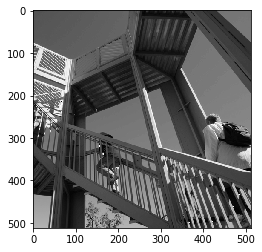

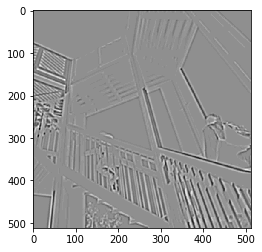

In [15]:
import scipy as sp #librería de señales
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería de graficación
import scipy.ndimage as nd
import cv2 as cv
from sympy import *
import math

imagen  = sp.misc.ascent() # cargamos una imagen de muestra que se encuentra en la librería scipy
# imagen = cv.imread('imagen_gris.jpg', 0) #recuerda cambiar el nombre de tu imagen
#imagen = sp.misc.imread('imagen_gris.jpg')

# imagen = plt.imread("imagen_gris2.png")
plt.imshow(imagen, cmap='gray') #visualización de la imagen
plt.show()
LoG = nd.gaussian_laplace(imagen, 2) #aplicación del filtro Laplaciano de Gauss a la imagen de muestra
plt.imshow(LoG, cmap='gray') #visualizamos la imagen filtrada
plt.show()

**Actividad 1**

Esta actividad se debe realizar por regiones de la imagen, es decir, no se toma la imagen completa sino que se trabaja por segmentos de filas o columnas de acuerdo a tu consideración.

Para cada segmento de la imagen filtrada encuentra un polinomio interpolador (debes encontrar la ecuación del polinomio) y con alguno de los métodos de solución de ecuaciones determina el cruce por cero de ese polinomio. Crea una imagen totalmente negra de las mismas dimensiones de la imagen que estás trabajando y en el valor de $x$ donde se detecte el cruce por cero asigna un valor de 255 (blanco), de esta forma en la nueva imagen se deben ver los bordes de la imagen filtrada.

In [16]:
imagen_vacia = np.zeros(np.shape(imagen))

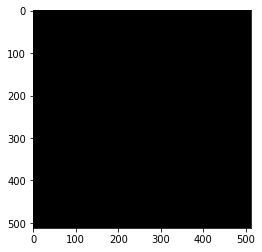

In [17]:
plt.imshow(imagen_vacia, cmap='gray') #visualizamos la imagen filtrada
plt.show()

In [18]:
def lagrange(x_arr, y_arr):
    x = Symbol('x')
    factores = []
    if not len(x_arr) == len(y_arr) :
        print('Error, el conjunto de X y Y debe tener la misma cantidad')
        return
    else:
        polinomio = ''
        max_k = len(x_arr)
        max_i = len(y_arr)
        for k in range(0, max_k):
            factores_a_multiplicar = []
            for i in range(0, max_i):
                if i == k:
                    continue
                factores_a_multiplicar.append('(x-%s)/(%s-%s)' % (x_arr[i], x_arr[k], x_arr[i]))
            temp_lx = '*'.join(factores_a_multiplicar) 
            temp_lx = '((%s) * %s)' % (temp_lx, y_arr[k])
            factores.append(temp_lx)
            factores_a_multiplicar = []
        polinomio = '+'.join(factores)
        return simplify(polinomio)

In [19]:
FUN = vars(math) # nos aseguramos que podamos utilizar funciones trigonométricas u otras funciones especiales
UMBRAL = 10 ** -9 # Constante UMBRAL o Epsilon
incremental = float(1)
max_iteracciones = 8

In [20]:
def evaluar(funcion, valor): # Funcion para ahorrarme un parametro
    x = Symbol('x')
    return funcion.subs(x, valor)

In [21]:
def busqueda_incremental(p_inicial, incremento, funcion):
    iteraccion = 0
    if abs(evaluar(funcion, p_inicial)) <= UMBRAL: # Evaluamos si se cumple con el primer punto
        return p_inicial
    punto_nuevo = p_inicial + incremento
    while (evaluar(funcion, punto_nuevo) * evaluar(funcion, p_inicial)) > 0: #Seguimos evaluando en cada incremento
        iteraccion += 1
        p_inicial =  punto_nuevo
        punto_nuevo = p_inicial + incremento
        
        if iteraccion > max_iteracciones: # Si se llega al limite de iteracciones rompemos el ciclo
            break
    return punto_nuevo

In [22]:
for row in range(0, np.shape(imagen)[0]):
    print("CHANGE ROW %s " % row)
    for column in range(7, np.shape(imagen)[1], 7):
        list_y = LoG[row][column - 7:column]
        list_x = [i for i in range(7)]
        if not set(list_y) == set([0] * 7):
            pol = lagrange(list_x, list_y)
            # print(list_y)
            # print(pol)
            index = busqueda_incremental(0, 1, pol)
            #print(index)
            #print(row)
            #print(column)
            #print(column-7 + index -1)
            #print(LoG[row])
            try:
                imagen_vacia[row][column-7 + index -1] = 255
            except IndexError:
                pass

CHANGE ROW 0 
CHANGE ROW 1 
CHANGE ROW 2 
CHANGE ROW 3 
CHANGE ROW 4 
CHANGE ROW 5 
CHANGE ROW 6 
CHANGE ROW 7 
CHANGE ROW 8 
CHANGE ROW 9 
CHANGE ROW 10 
CHANGE ROW 11 
CHANGE ROW 12 
CHANGE ROW 13 
CHANGE ROW 14 
CHANGE ROW 15 
CHANGE ROW 16 
CHANGE ROW 17 
CHANGE ROW 18 
CHANGE ROW 19 
CHANGE ROW 20 
CHANGE ROW 21 
CHANGE ROW 22 
CHANGE ROW 23 
CHANGE ROW 24 
CHANGE ROW 25 
CHANGE ROW 26 
CHANGE ROW 27 
CHANGE ROW 28 
CHANGE ROW 29 
CHANGE ROW 30 
CHANGE ROW 31 
CHANGE ROW 32 
CHANGE ROW 33 
CHANGE ROW 34 
CHANGE ROW 35 
CHANGE ROW 36 
CHANGE ROW 37 
CHANGE ROW 38 
CHANGE ROW 39 
CHANGE ROW 40 
CHANGE ROW 41 
CHANGE ROW 42 
CHANGE ROW 43 
CHANGE ROW 44 
CHANGE ROW 45 
CHANGE ROW 46 
CHANGE ROW 47 
CHANGE ROW 48 
CHANGE ROW 49 
CHANGE ROW 50 
CHANGE ROW 51 
CHANGE ROW 52 
CHANGE ROW 53 
CHANGE ROW 54 
CHANGE ROW 55 
CHANGE ROW 56 
CHANGE ROW 57 
CHANGE ROW 58 
CHANGE ROW 59 
CHANGE ROW 60 
CHANGE ROW 61 
CHANGE ROW 62 
CHANGE ROW 63 
CHANGE ROW 64 
CHANGE ROW 65 
CHANGE ROW 66 
CHANG

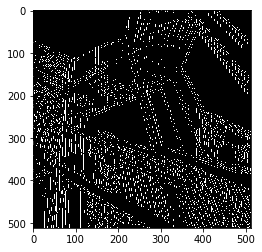

In [23]:
plt.imshow(imagen_vacia, cmap='gray') #visualizamos la imagen filtrada
plt.show()

0
